In [257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import LSTM, Dense
from cond_rnn import ConditionalRNN
import tensorflow as tf
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
import time

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

In [220]:
import prince
import mca

In [258]:
gateway = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-gateway-subset.csv')
controller = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-controller-subset.csv')
facility = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-facility-subset.csv')


In [259]:
CT_diff = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/08-06-20-CT-daily-difference.csv')

GT_diff = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/08-06-20-GT-daily-difference.csv')

CT_prediction = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-31-20-abs-total-error.csv')

GT_prediction = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/08-03-20-GT-abs-total-error.csv')

facility = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-facility-subset.csv')

In [296]:
facility

,TankID,SystemName,TankSerial,TankStatusName,CreatedOn,ModifiedOn,TankGeometry,TankVolume,TankArea,TankHeight,...,OwnerDomainName,ZIPCode,SoldTo,ShipTo,SalesTerritory,SBU,SalesOrg,SAPCustomerID,SystemID,SystemSource
0,10768,"System 1, Sump 2",911804,Online,2013-09-03 13:04:00,2018-02-16 09:01:00,Cube,120.0,NaN,42.200001,...,aaron.miles@ecolab.com,53007,500064354,500064354,WL14616,FB,1001,NaN,9655,NaN
1,7467,BF3,905149,Online,2012-10-17 10:39:00,2017-01-19 10:57:00,Cube,30.0,NaN,17.879999,...,bmtannehill@ecolab.com,19703,1052792,2153365,WH10208,chemical,1001,NaN,20450,NaN
2,1282,Scrubber - TLA,17491,Online,2009-11-08 09:50:00,2016-05-23 17:47:00,Cube,385.0,NaN,42.200001,...,cathy.hernandez@ecolab.com,53522-9772,1081960,1081960,WL14627,UNASSIGNED,1001,2226635.0,47498,TLA
3,10778,Ammonia Condenser,912988,Online,2013-09-04 06:06:00,2016-06-29 21:37:00,Cube,120.0,NaN,42.200001,...,cathy.hernandez@ecolab.com,54983,150205875,150205875,WL14618,FB,1001,150205875.0,152030,ENV
4,10980,Main Cooling Towers East,911533,Online,2013-09-17 16:23:00,2017-09-15 10:42:00,Cube,120.0,NaN,42.200001,...,aaron.miles@ecolab.com,53105,1024303,1024303,WL14616,MN,1001,NaN,13447,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,298080,7330,950129,Online,2018-08-31 09:41:00,2018-08-31 09:42:00,Cube,65.0,1.0,26.500000,...,NaN,54494,500099334,150364700,WL14618,NaN,1001,NaN,1394796,NaN
218,375414,1825,42355,Online,2019-09-18 08:35:00,2019-12-06 08:18:00,Cube,105.0,1.0,42.843800,...,Alex.Bogda@ecolab.com,12158,500062161,500062161,WH10210,CH,1001,NaN,1562885,NaN
219,386783,3DT230,180866,Online,2020-01-10 09:28:00,2020-01-24 11:47:00,Cube,120.0,1.0,42.200001,...,sddarrah@ecolab.com,06492,150124233,150124233,WH10204,PM,1001,NaN,1582040,NaN
220,387170,1820 (Amine),180688,Online,2020-01-23 09:21:00,2020-03-16 13:06:00,Cube,105.0,1.0,42.843800,...,bmtannehill@ecolab.com,21078,1079918,1079918,WH10208,CH,1001,NaN,1583165,NaN


In [261]:
facility_CT = facility[facility['TankID'].isin(CT_prediction['TANK_ID'])]

In [301]:
#facility_CT.loc[:,['TankID','TankGeometry','TankVolume','TankType']]
facility_CT


,TankID,SystemName,TankSerial,TankStatusName,CreatedOn,ModifiedOn,TankGeometry,TankVolume,TankArea,TankHeight,...,OwnerDomainName,ZIPCode,SoldTo,ShipTo,SalesTerritory,SBU,SalesOrg,SAPCustomerID,SystemID,SystemSource
49,30850,3DT230 tank,911434,Online,2015-04-08 10:32:00,2020-04-22 23:55:00,Cube,110.0,NaN,42.200001,...,NaN,53158,500087492,500087492,WL14616,FB,1001,NaN,377275,TCP
50,30851,ST-70 tank,910544,Online,2015-04-08 10:34:00,2020-04-22 23:55:00,Cube,110.0,NaN,42.200001,...,NaN,53158,500087492,500087492,WL14616,FB,1001,NaN,377276,TCP
51,30852,H-550 tank,911076,Online,2015-04-08 10:39:00,2020-04-22 23:55:00,Cube,110.0,NaN,42.200001,...,NaN,53158,500087492,500087492,WL14616,FB,1001,NaN,377278,TCP
55,34507,TRAC109 tank,3DT003604-03,Online,2015-06-22 10:58:00,2020-04-08 03:43:00,Vertical Cylinder,55.0,NaN,33.500000,...,NaN,17113,500086568,500086568,WH10208,PM,1001,NaN,428187,TCP
56,34508,7320 tank,3DT003604-01,Online,2015-06-22 11:00:00,2020-04-08 03:43:00,Vertical Cylinder,55.0,NaN,33.500000,...,NaN,17113,500086568,500086568,WH10208,PM,1001,NaN,428188,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,387311,ST-70 tank,9713493,Online,2020-01-29 11:12:00,2020-04-22 23:40:00,Cube,110.0,NaN,42.200001,...,sean.conlon@ecolab.com,53511,150207950,150207950,WL14627,FB,1001,150207934.0,1583571,TCP
204,516817,3DT231 tank,305494,Online,2020-05-07 14:34:00,2020-05-07 16:09:00,Cube,100.0,NaN,42.590000,...,NaN,54130,500101126,150377873,WL14626,FB,1001,NaN,1718306,TCP
205,517921,3DT230 tank,330249,Online,2020-05-08 09:51:00,NaN,Cube,182.0,NaN,45.279999,...,samuel.smogard@ecolab.com,54961,1039386,2219982,WL14615,FB,1001,NaN,1719434,TCP
207,544779,ST-70 tank,915755,Online,2020-05-26 13:51:00,2020-05-26 13:52:00,Cube,105.0,NaN,42.840000,...,NaN,54311,150397638,150397637,WL14615,FB,1001,150397638.0,1747297,TCP


In [263]:
CT_prediction.isna().sum()

TANK_ID            0
abs_total_error    0
dtype: int64

In [264]:
y = CT_prediction['abs_total_error']
y

0      0.335166
1      4.496979
2     58.004186
3      1.446517
4      0.240746
        ...    
88     1.812628
89     9.835035
90    45.995577
91     1.854121
92     0.138903
Name: abs_total_error, Length: 93, dtype: float64

clustering with facility features after LSTM

Do the variables reduction first then k-means clustering <br>
mca is a Multiple Correspondence Analysis (MCA) package for python, intended to be used with pandas. MCA is a feature extraction method; essentially PCA for categorical variables. You can use it, for example, to address multicollinearity or the curse of dimensionality with big categorical variables.

In [265]:
facility_CT_subset = facility_CT[['SystemName','TankSerial','TankStatusName','TankGeometry','TankVolume','OrderVolume','ProbeName','ProductName','MaxLevelAlert','OrderLevelAlert','SafetyLevelAlert','HeelLevelAlert','HighFeedRateAlert','LowFeedRateAlert','IsAutomatedOrdering','TankName', 'TankOrder', 'TankSafety','ZIPCode', 'SalesTerritory']]

facility_CT_subset['abs_total_error'] = y.values

C:\Users\wanru\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [266]:

facility_CT_subset.dropna(inplace=True)

C:\Users\wanru\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [267]:
facility_CT_subset.shape

(85, 21)

In [268]:
#facility_CT_subset.isna().sum()  
facility_CT_subset.dtypes

SystemName              object
TankSerial              object
TankStatusName          object
TankGeometry            object
TankVolume             float64
OrderVolume            float64
ProbeName               object
ProductName             object
MaxLevelAlert             bool
OrderLevelAlert           bool
SafetyLevelAlert          bool
HeelLevelAlert            bool
HighFeedRateAlert         bool
LowFeedRateAlert          bool
IsAutomatedOrdering       bool
TankName                object
TankOrder              float64
TankSafety             float64
ZIPCode                 object
SalesTerritory          object
abs_total_error        float64
dtype: object

In [272]:
#labelencoder = LabelEncoder()
facility_CT_categ = facility_CT_subset[['SystemName','TankSerial','TankStatusName','TankGeometry','ProbeName','ProductName','TankName','ZIPCode','SalesTerritory']]
from collections import defaultdict
d = defaultdict(LabelEncoder)
facility_CT_subset[['SystemName','TankSerial','TankStatusName','TankGeometry','ProbeName','ProductName','TankName','ZIPCode','SalesTerritory']] = facility_CT_categ.apply(lambda x: d[x.name].fit_transform(x))

C:\Users\wanru\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [273]:
facility_CT_subset[['MaxLevelAlert','OrderLevelAlert','SafetyLevelAlert','HeelLevelAlert','HighFeedRateAlert','LowFeedRateAlert','IsAutomatedOrdering']] = facility_CT_subset[['MaxLevelAlert','OrderLevelAlert','SafetyLevelAlert','HeelLevelAlert','HighFeedRateAlert','LowFeedRateAlert','IsAutomatedOrdering']].astype(int)

In [274]:
facility_CT_subset = facility_CT_subset.astype(float)
facility_CT_subset.dtypes
#facility_CT_subset.shape

SystemName             float64
TankSerial             float64
TankStatusName         float64
TankGeometry           float64
TankVolume             float64
OrderVolume            float64
ProbeName              float64
ProductName            float64
MaxLevelAlert          float64
OrderLevelAlert        float64
SafetyLevelAlert       float64
HeelLevelAlert         float64
HighFeedRateAlert      float64
LowFeedRateAlert       float64
IsAutomatedOrdering    float64
TankName               float64
TankOrder              float64
TankSafety             float64
ZIPCode                float64
SalesTerritory         float64
abs_total_error        float64
dtype: object

In [275]:
facility_CT_subset = facility_CT_subset.replace([np.inf, -np.inf], np.nan)

In [276]:
facility_CT_subset.isna().sum()

SystemName             0
TankSerial             0
TankStatusName         0
TankGeometry           0
TankVolume             0
OrderVolume            0
ProbeName              0
ProductName            0
MaxLevelAlert          0
OrderLevelAlert        0
SafetyLevelAlert       0
HeelLevelAlert         0
HighFeedRateAlert      0
LowFeedRateAlert       0
IsAutomatedOrdering    0
TankName               0
TankOrder              0
TankSafety             0
ZIPCode                0
SalesTerritory         0
abs_total_error        0
dtype: int64

In [277]:
# random forest importance chart
RF = RandomForestRegressor(n_estimators=100, min_samples_leaf=8, random_state=1)
RF.fit(facility_CT_subset.iloc[:,:-1], facility_CT_subset['abs_total_error'])



RandomForestRegressor(min_samples_leaf=8, random_state=1)

Text(0.5, 0, 'Relative Importance')

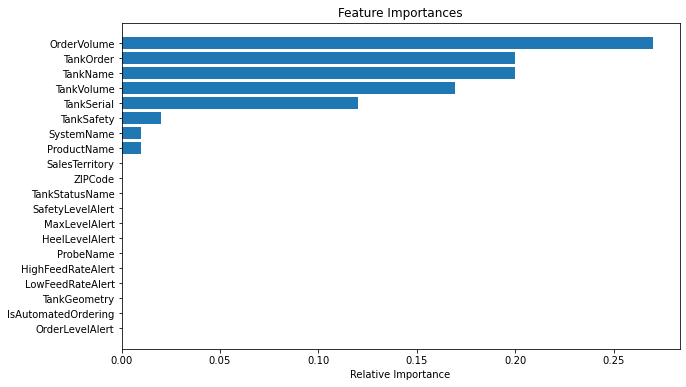

In [283]:
features=facility_CT_subset.iloc[:,:-1].columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#1f77b4', align='center',)
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [139]:
mca_prince = prince.MCA()
mca_prince = mca_prince.fit(facility_CT_subset) 
mca_prince = mca_prince.transform(facility_CT_subset) 
print(mca_prince)

#ax = mca.plot_coordinates(
#     X=X,
#     ax=None,
#     figsize=(6, 6),
#     show_row_points=True,
#     row_points_size=10,
#     show_row_labels=False,
#     show_column_points=True,
#     column_points_size=30,
#     show_column_labels=False,
#     legend_n_cols=1
#     )

#ax.get_figure().savefig('images/mca_coordinates.svg')

C:\Users\wanru\AppData\Roaming\Python\Python36\site-packages\prince\ca.py:54: RuntimeWarning: divide by zero encountered in power
  S = sparse.diags(r ** -0.5) @ (X - np.outer(r, c)) @ sparse.diags(c ** -0.5)


ValueError: array must not contain infs or NaNs

In [243]:
import mca
mca = mca.MCA(facility_CT_subset.iloc[:,:-1])
mca_1 = mca.fs_r(1) # 1 = 100%, meaning preserve all variance.
mca_1.shape

(85, 2)

In [244]:
mca_2 = mca.fs_r()
mca_2.shape # 90% 

(85, 1)

In [245]:
mca_1

array([[-7.14431195e-02,  3.90639442e-02],
       [-9.48759526e-02,  5.34795665e-02],
       [-8.54009031e-02,  7.14203335e-02],
       [-2.59698466e-02,  9.83049351e-02],
       [-1.69569028e-04,  5.59191015e-02],
       [-8.40927052e-02,  1.41833947e-01],
       [-6.83152653e-02,  4.97060801e-03],
       [-1.20440610e-01,  1.75217818e-01],
       [ 1.82061434e-01, -2.67710062e-02],
       [-2.09321844e-02,  5.10446338e-02],
       [ 4.58920966e-01,  4.76799593e-02],
       [ 4.63689379e-01,  3.76182527e-02],
       [ 4.42039565e-01,  4.83439953e-02],
       [ 3.15918517e-01,  1.40699674e-02],
       [-1.84579050e-01,  2.56013448e-02],
       [-9.03355973e-02,  6.08849311e-02],
       [-1.91969713e-01,  6.52393123e-02],
       [-6.75648331e-02,  2.75206537e-02],
       [-8.23070723e-02,  5.22859405e-02],
       [-9.71311032e-02,  7.92589897e-02],
       [-1.81992252e-01,  6.60828267e-02],
       [-4.90329787e-02,  6.10034815e-02],
       [-5.09553559e-02,  5.33548489e-02],
       [-1.

In [250]:
df = {'factor_1':mca_1[:,0],'abs_totoal_error': facility_CT_subset.iloc[:,-1]}
 
df1 = pd.DataFrame(df,columns=['factor_1','abs_totoal_error'])
print(df1)

     factor_1  abs_totoal_error
49  -0.071443          0.335166
50  -0.094876          4.496979
51  -0.085401         58.004186
55  -0.025970          1.446517
56  -0.000170          0.240746
..        ...               ...
201 -0.114638          1.812628
204 -0.193598          9.835035
205 -0.185294         45.995577
207 -0.114244          1.854121
208 -0.190082          0.138903

[85 rows x 2 columns]


Text(0.5, 1.0, 'clustering controller tanks')

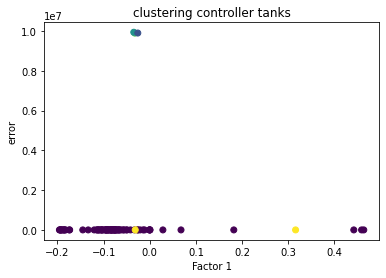

In [252]:
random_state = 10
y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(df1)
plt.scatter(mca_1[:,0],facility_CT_subset.iloc[:,-1:],c=y_pred)
plt.xlabel("Factor 1")
plt.ylabel("error")
plt.title("clustering controller tanks")

Text(0.5, 1.0, 'clustering controller tanks')

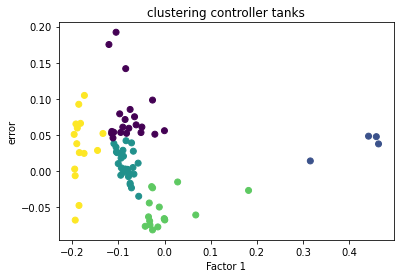

In [253]:
random_state = 10
y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(mca_1)
plt.scatter(mca_1[:,0],mca_1[:,1],c=y_pred)
plt.xlabel("Factor 1")
plt.ylabel("error")
plt.title("clustering controller tanks")

regression : tank level. partial tanks for training <br>
whether predict more variance **facility variable selection** <br> 
Thoughts: MCA project the data into lower dimension but hard to explain <br>
add constant variable back to LSTM moving window


In [255]:
facility_CT_subset

,SystemName,TankSerial,TankStatusName,TankGeometry,TankVolume,OrderVolume,ProbeName,ProductName,MaxLevelAlert,OrderLevelAlert,...,HeelLevelAlert,HighFeedRateAlert,LowFeedRateAlert,IsAutomatedOrdering,TankName,TankOrder,TankSafety,ZIPCode,SalesTerritory,abs_total_error
49,10.0,57.0,1.0,0.0,110.0,55.0,0.0,6.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,25.0,10.0,14.0,8.0,0.335166
50,27.0,54.0,1.0,0.0,110.0,55.0,0.0,21.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,50.0,5.0,14.0,8.0,4.496979
51,26.0,55.0,1.0,0.0,110.0,55.0,0.0,20.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,25.0,5.0,14.0,8.0,58.004186
55,30.0,36.0,1.0,1.0,55.0,55.0,0.0,22.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,15.0,10.0,10.0,2.0,1.446517
56,15.0,35.0,1.0,1.0,55.0,55.0,0.0,10.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,20.0,10.0,10.0,2.0,0.240746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,27.0,75.0,1.0,0.0,110.0,55.0,0.0,21.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,55.0,27.5,17.0,12.0,1.812628
204,11.0,15.0,1.0,0.0,100.0,15.0,0.0,7.0,0.0,1.0,...,0.0,0.0,0.0,0.0,10.0,55.0,27.5,21.0,11.0,9.835035
205,10.0,17.0,1.0,0.0,182.0,15.0,0.0,6.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,90.0,27.5,26.0,7.0,45.995577
207,27.0,72.0,1.0,0.0,105.0,55.0,0.0,21.0,0.0,1.0,...,0.0,0.0,0.0,0.0,12.0,55.0,25.5,23.0,7.0,1.854121
